#Exploratory data analysis and visualization 

Second part of the project.  In this notebook we'll pose 5 questions regarding the data and try to find answers using visualization methods. 

Loading necessary packages and files 

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd
import os 
%matplotlib inline

from google.colab import drive
drive.mount("/content/gdrive")
os.chdir("/content/gdrive/MyDrive/Online_Lecture_Notes/Data_Analysis_w_Python_Jovian/Course_Project/data")


df2 = pd.read_csv("EU_Antibiotic_Resistance_Data_combinedcleaned.csv")

Mounted at /content/gdrive


Let's start off with a basic line plot for total number of tested isolates in Austria to see if everything is ok. 

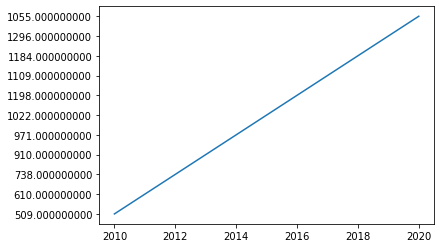

In [ ]:
plt.plot(df2.Time[(df2["RegionName"]=="Austria")&(df2['Population']=="Carbapenems")&(df2["Indicator"]=="Total tested isolates")],df2.NumValue[(df2["RegionName"]=="Austria")&(timefiltered_df2['Population']=="Carbapenems")&(df2["Indicator"]=="Total tested isolates")])

Seems that number of isolates are not in float format, we'll have to do a little bit more data pre-processing to start EDA. 

##Further Pre-Processing

In [ ]:
df2.dtypes

Population    object
RegionName    object
Time           int64
Indicator     object
NumValue      object
dtype: object

In [ ]:
df2["Population"] =df2["Population"].astype(str)
df2["RegionName"] =df2["RegionName"].astype(str)
df2["Indicator"] =df2["Indicator"].astype(str)
df2["NumValue"] =df2["NumValue"].astype(float, copy = False)

ValueError: ignored

In [ ]:
#Error message shows us that there are "-" values in NumValue column that are preventing us to change the type to float
#Lets find which values are those and convert them to zero (0) 

df2.loc[df2["NumValue"]=="-"]

,Population,RegionName,Time,Indicator,NumValue
2340,Carbapenems,Iceland,2011,"R - resistant isolates, percentage",-
2370,Carbapenems,Iceland,2012,"R - resistant isolates, percentage",-
2400,Carbapenems,Iceland,2013,"R - resistant isolates, percentage",-
2430,Carbapenems,Iceland,2014,"R - resistant isolates, percentage",-
2460,Carbapenems,Iceland,2015,"R - resistant isolates, percentage",-
2490,Carbapenems,Iceland,2016,"R - resistant isolates, percentage",-
2520,Carbapenems,Iceland,2017,"R - resistant isolates, percentage",-
2550,Carbapenems,Iceland,2018,"R - resistant isolates, percentage",-
2580,Carbapenems,Iceland,2019,"R - resistant isolates, percentage",-


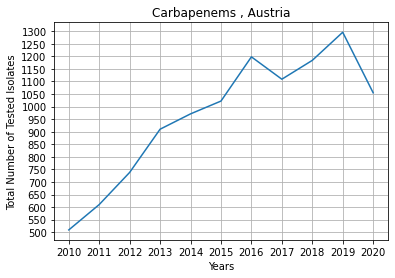

In [ ]:
#replacing "-" with number zero
df2['NumValue']= df2["NumValue"].replace(["-"],0)

#changing the datatypes from object to following types 
df2["Population"] =df2["Population"].astype(str)
df2["RegionName"] =df2["RegionName"].astype(str)
df2["Indicator"] =df2["Indicator"].astype(str)
df2["NumValue"] =df2["NumValue"].astype(float, copy = False)

#decreasing decimal points to 1 for all values 
df2.NumValue = df2.NumValue.round(1)

#now lets plot again 
plt.plot(df2.Time[(df2["RegionName"]=="Austria")&(df2['Population']=="Carbapenems")&(df2["Indicator"]=="Total tested isolates")],
         df2.NumValue[(df2["RegionName"]=="Austria")&(df2['Population']=="Carbapenems")&(df2["Indicator"]=="Total tested isolates")])
plt.locator_params(axis='y', nbins=18)
plt.locator_params(axis='x', nbins=20)
plt.xlabel("Years")
plt.ylabel("Total Number of Tested Isolates")
plt.title("Carbapenems , Austria")
plt.grid()

#Exploratory Analysis Questions

Objective of the course project was to ask 5 questions about the dataset and to find the answers by drawing graphs or using Numpy operations. 

Questions: 
1. How does the resistance percentage changed for Aminoglycosides between 2010 and 2020?
2. How does the resistance percentage for Carbapenems in Scandinavia compare to the percentage in Southern Europe? 
3. What are the resistance trends in Balkans for all treatment options?
4. What are the resistance trends in Central Europe for all treatment options?

##Question 1

Following chart will display the resistant strain percentage in all countries for 2010 and 2020.  For better visualization, data bars for countries with increased resistance percentage in 2020 will be colored red.

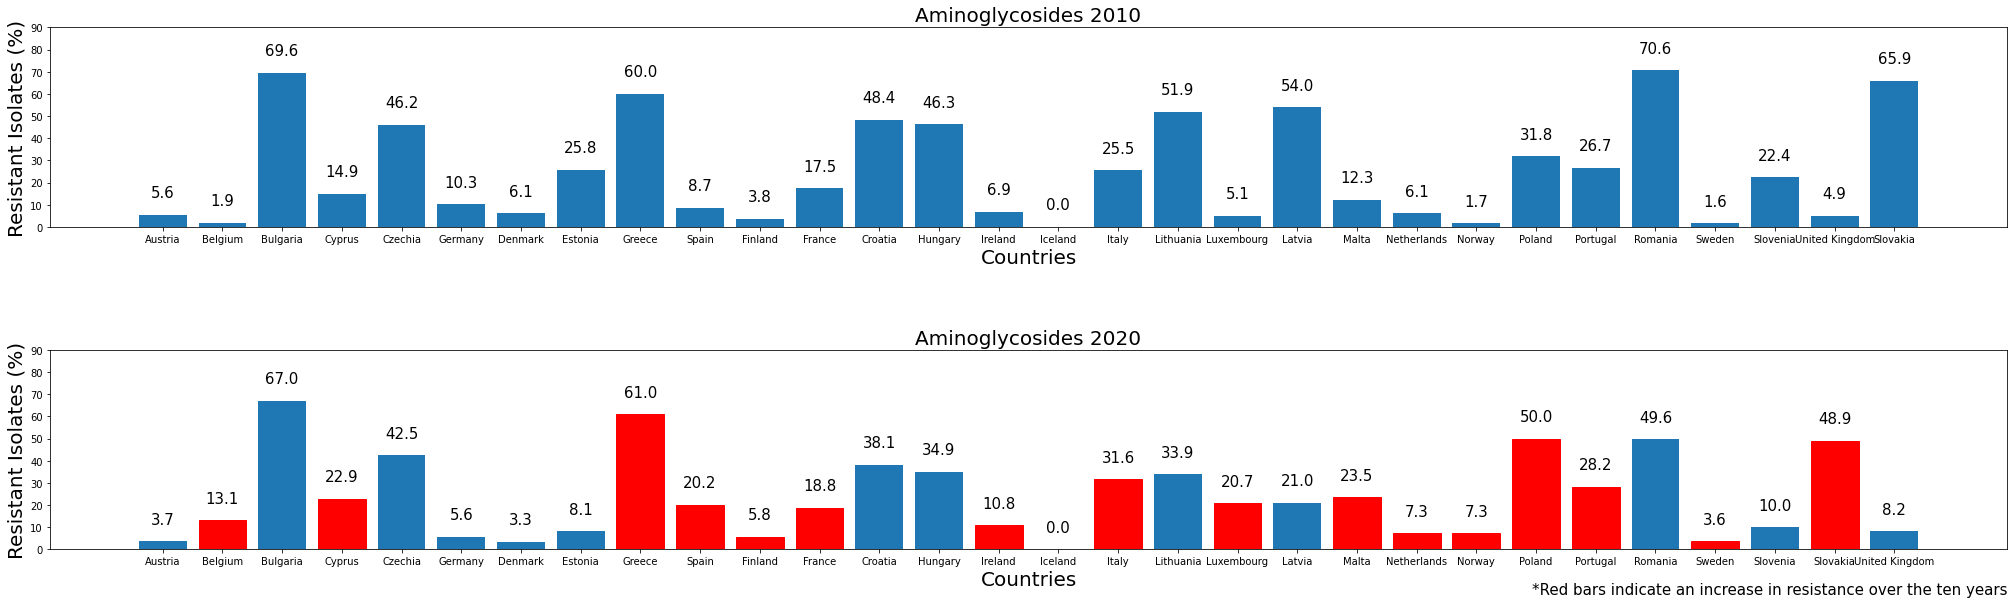

In [ ]:
fig,axes = plt.subplots(2,1,figsize=(30,10));

#Plotting Aminoglycosides 2010

axes[0].bar( df2.RegionName[(df2["Indicator"]=="R - resistant isolates, percentage  ")&(df2["Time"]==2010)&(df2["Population"]=="Aminoglycosides")],
        df2.NumValue[(df2["Indicator"]=="R - resistant isolates, percentage  ")&(df2["Time"]==2010)&(df2["Population"]=="Aminoglycosides")])

plt.tight_layout(pad=8)

axes[0].set_title("Aminoglycosides 2010",fontsize = 20)
axes[0].set_xlabel("Countries",fontsize = 20)
axes[0].set_ylabel("Resistant Isolates (%)",fontsize = 20);
axes[0].set_ylim(0,90)

#Adding percentage labels on top of each bar for 2010 

x =[]
y=[]

for i in (df2.RegionName[(df2["Indicator"]=="R - resistant isolates, percentage  ")&(df2["Time"]==2010)&(df2["Population"]=="Aminoglycosides")]):
  x.append(i)

for i in df2.NumValue[(df2["Indicator"]=="R - resistant isolates, percentage  ")&(df2["Time"]==2010)&(df2["Population"]=="Aminoglycosides")]:
  y.append(i)

def addlabels (a,b):
  for i in range(len(a)):
    axes[0].text(i,b[i],str(b[i])+"\n", ha= "center",fontsize=15)

addlabels(x,y)



#Plotting Aminoglycosides 2020 
#Named the second chart barlist to use it in coloring step
barlist = axes[1].bar( df2.RegionName[(df2["Indicator"]=="R - resistant isolates, percentage  ")&(df2["Time"]==2020)&(df2["Population"]=="Aminoglycosides")],
        df2.NumValue[(df2["Indicator"]=="R - resistant isolates, percentage  ")&(df2["Time"]==2020)&(df2["Population"]=="Aminoglycosides")])

plt.tight_layout(pad=8)

axes[1].set_title("Aminoglycosides 2020",fontsize = 20)
axes[1].set_xlabel("Countries",fontsize = 20)
axes[1].set_ylabel("Resistant Isolates (%)",fontsize = 20);
axes[1].set_ylim(0,90)

#Adding percentage labels on top of each bar for 2020 

a =[]
b =[]

for i in (df2.RegionName[(df2["Indicator"]=="R - resistant isolates, percentage  ")&(df2["Time"]==2020)&(df2["Population"]=="Aminoglycosides")]):
  a.append(i)

for i in df2.NumValue[(df2["Indicator"]=="R - resistant isolates, percentage  ")&(df2["Time"]==2020)&(df2["Population"]=="Aminoglycosides")]:
  b.append(i)

def addlabels1 (ab,bb):
  for i in range(len(ab)):
    axes[1].text(i,bb[i],str(bb[i])+"\n", ha= "center",fontsize=15)

addlabels1(a,b)

#Coloring higher percentage countries red.

for i in range(len(b)):
  if y[i]<b[i]:
    barlist[i].set_color("r")

axes[1].annotate("*Red bars indicate an increase in resistance over the ten years",
            xy = (1.0, -0.2), ha='right', xycoords='axes fraction',
            va="center",
            fontsize=15);

#saving the figure
image_dir = "/content/gdrive/MyDrive/Online_Lecture_Notes/Data_Analysis_w_Python_Jovian/Course_Project/charts"
plt.savefig(f"{image_dir}/Aminoglycoside_Resistance_2010vs2020.jpg",dpi=600)

Strains collected from more than half of all the countries in the dataset experienced an increase in resistance percentages against aminoglycosides in 2020 compared to 2010.  

It's interesting to note that among the countries that already had resistance percentage over 45% in 2010, Greece was the only country that saw an increase in 2020 while all the others managed to decrease the ratio of resistant strains. 

##Question 2

The following chart will illustrate if different regions of Europe have different resistance profiles. 

We'll compare Scandinavia (Denmark, Sweden, Norway, Finland, Iceland) to Southern Europe (Portugal, Spain, Italy, Malta, Greece). 

First plot compares 2010,2015 and 2020 in bar plots to see the overall trends 

Second plot compares all the years in line graphs.

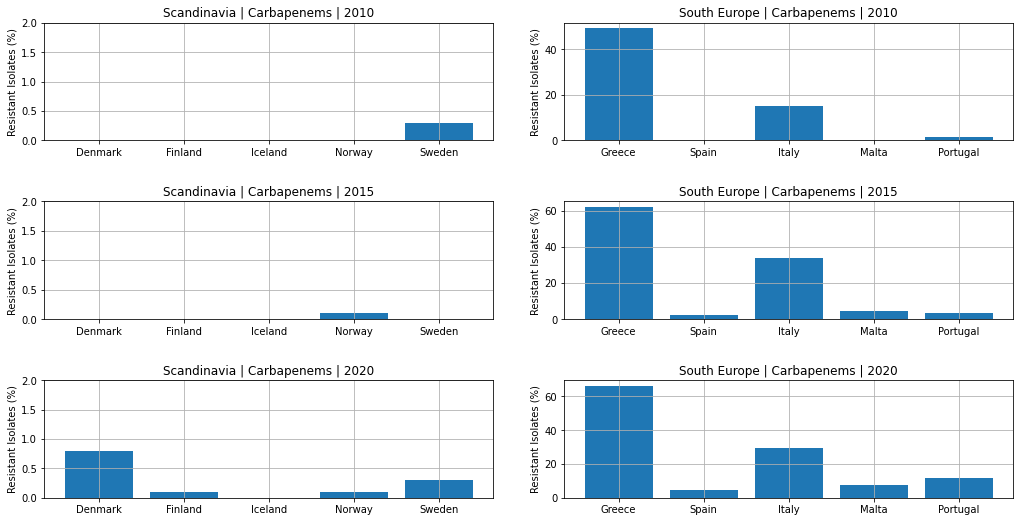

In [ ]:
carbapenems_percentage = (df2["Population"]=="Carbapenems")&(df2["Indicator"]=="R - resistant isolates, percentage  ")
scandinavia = ((df2["RegionName"]=="Denmark") | (df2["RegionName"]=="Finland")|(df2["RegionName"]=="Iceland")|(df2["RegionName"]=="Norway")|(df2["RegionName"]=="Sweden"))
south_europe= ((df2["RegionName"]=="Greece") | (df2["RegionName"]=="Italy")|(df2["RegionName"]=="Malta")|(df2["RegionName"]=="Portugal")|(df2["RegionName"]=="Spain"))

fig,axes = plt.subplots(3,2,figsize=(15,8));

plt.tight_layout(pad=4)

axes[0,0].bar(df2.RegionName[(scandinavia)& (df2["Time"]==2010)& carbapenems_percentage ],
              df2.NumValue[(scandinavia)& (df2["Time"]==2010)& carbapenems_percentage ]  )
axes[0,0].set_title("Scandinavia | Carbapenems | 2010")
axes[0,0].set_ylabel("Resistant Isolates (%)");
axes[0,0].grid()
axes[0,0].set_ylim(0,2)

axes[0,1].bar(df2.RegionName[south_europe & (df2["Time"]==2010) & carbapenems_percentage ],
              df2.NumValue[south_europe & (df2["Time"]==2010) & carbapenems_percentage ])
axes[0,1].set_title("South Europe | Carbapenems | 2010")
axes[0,1].set_ylabel("Resistant Isolates (%)");
axes[0,1].grid()

axes[1,0].bar(df2.RegionName[(scandinavia)& (df2["Time"]==2015)& carbapenems_percentage ],
              df2.NumValue[(scandinavia)& (df2["Time"]==2015)& carbapenems_percentage ]  )
axes[1,0].set_title("Scandinavia | Carbapenems | 2015")
axes[1,0].set_ylabel("Resistant Isolates (%)");
axes[1,0].grid()
axes[1,0].set_ylim(0,2)

axes[1,1].bar(df2.RegionName[south_europe & (df2["Time"]==2015) & carbapenems_percentage ],
              df2.NumValue[south_europe & (df2["Time"]==2015) & carbapenems_percentage ])
axes[1,1].set_title("South Europe | Carbapenems | 2015")
axes[1,1].set_ylabel("Resistant Isolates (%)");
axes[1,1].grid()

axes[2,0].bar(df2.RegionName[(scandinavia)& (df2["Time"]==2020)& carbapenems_percentage ],
              df2.NumValue[(scandinavia)& (df2["Time"]==2020)& carbapenems_percentage ]  )
axes[2,0].set_title("Scandinavia | Carbapenems | 2020")
axes[2,0].set_ylabel("Resistant Isolates (%)");
axes[2,0].grid()
axes[2,0].set_ylim(0,2)


axes[2,1].bar(df2.RegionName[south_europe & (df2["Time"]==2020) & carbapenems_percentage ],
              df2.NumValue[south_europe & (df2["Time"]==2020) & carbapenems_percentage ])
axes[2,1].set_title("South Europe | Carbapenems | 2020")
axes[2,1].set_ylabel("Resistant Isolates (%)");
axes[2,1].grid()

#saving the figure
plt.savefig(f"{image_dir}/carbapenems_scandinaviaVSstheurope_2010,2015,2020.jpg",dpi=600)

It's very clear that Southern European countries have significantly higher resistance perecntages compared to Scandinavian countries. 

Among the Southern European countries, Greece consistently has the most resistant strains on all of the three years followed by Italy. For other 3 countries in South Europe there seems to be an increasing trend.  Line chart in the following section can illustrate this situation more clearly. 

For Scandinavian countries, Sweden seems to have had an decrease in the first 5 years and an increase in the next 5 years.  Denmark also experienced and increase between 2015 and 2020 in resistance.  Although there are some increasing trends, its important to point out that the resistance percentage wasn't above 1% in any of the Scandinavian countries which is a great success

###Line Graph for All Years in the Dataset

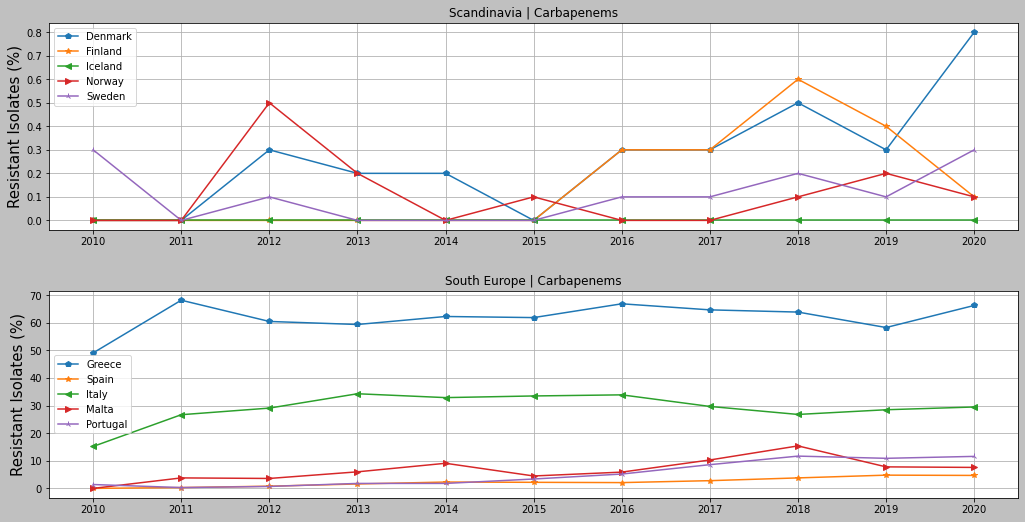

In [ ]:
carbapenems_percentage = (df2["Population"]=="Carbapenems")&(df2["Indicator"]=="R - resistant isolates, percentage  ")

fig,axes= plt.subplots(2,1,figsize=(15,8),facecolor="silver");
plt.tight_layout(pad=4)

#plotting Scandinavian data 

axes[0].plot(df2.Time[(df2["RegionName"]=="Denmark")& carbapenems_percentage],
               df2.NumValue[(df2["RegionName"]=="Denmark")&carbapenems_percentage],marker="p")
axes[0].plot(df2.Time[(df2["RegionName"]=="Finland")&carbapenems_percentage], 
             df2.NumValue[(df2["RegionName"]=="Finland")&carbapenems_percentage],marker="*");
axes[0].plot(df2.Time[(df2["RegionName"]=="Iceland")&carbapenems_percentage],
               df2.NumValue[(df2["RegionName"]=="Iceland")&carbapenems_percentage],marker="<");
axes[0].plot(df2.Time[(df2["RegionName"]=="Norway")&carbapenems_percentage],
               df2.NumValue[(df2["RegionName"]=="Norway")&carbapenems_percentage],marker=">");
axes[0].plot(df2.Time[(df2["RegionName"]=="Sweden")&carbapenems_percentage],
               df2.NumValue[(df2["RegionName"]=="Sweden")&carbapenems_percentage],marker="2");

axes[0].set_ylabel("Resistant Isolates (%)",fontsize=15)
axes[0].legend(["Denmark","Finland","Iceland","Norway","Sweden"],)
axes[0].set_title("Scandinavia | Carbapenems")
axes[0].grid()
axes[0].locator_params(axis="x",nbins=20)

#Plotting Southern Europe 

axes[1].plot(df2.Time[(df2["RegionName"]=="Greece")&carbapenems_percentage],
               df2.NumValue[(df2["RegionName"]=="Greece")&carbapenems_percentage],marker="p")
axes[1].plot(df2.Time[(df2["RegionName"]=="Spain")&carbapenems_percentage],
               df2.NumValue[(df2["RegionName"]=="Spain")&carbapenems_percentage],marker="*");
axes[1].plot(df2.Time[(df2["RegionName"]=="Italy")&carbapenems_percentage],
               df2.NumValue[(df2["RegionName"]=="Italy")&carbapenems_percentage],marker="<");
axes[1].plot(df2.Time[(df2["RegionName"]=="Malta")&carbapenems_percentage],
               df2.NumValue[(df2["RegionName"]=="Malta")&carbapenems_percentage],marker=">");
axes[1].plot(df2.Time[(df2["RegionName"]=="Portugal")&carbapenems_percentage],
               df2.NumValue[(df2["RegionName"]=="Portugal")&carbapenems_percentage],marker="2");

axes[1].set_ylabel("Resistant Isolates (%)",fontsize=15)
axes[1].legend(["Greece","Spain","Italy","Malta","Portugal"],)
axes[1].set_title("South Europe | Carbapenems")
axes[1].grid()
axes[1].locator_params(axis="x",nbins=20)

#saving the figure
plt.savefig(f"{image_dir}/carbapenems_scandinaviaVSstheurope_2010to2020.jpg",dpi=600,facecolor="silver")


By the end of the 10-year period, all the Scandinavian countries excluding Iceland had higher percentages of strains resistant to Carbapenems with marginal fluctuations over the years. 

As we suspected lower resistance countries in South Europe do have an upwards trend, especially prominent after 2014.  Although there has been some success in reversing the trend, Italy also has an overall increase in resistant strains 


##Question 3 

Let's now have a look how the trends were in the Balkans 

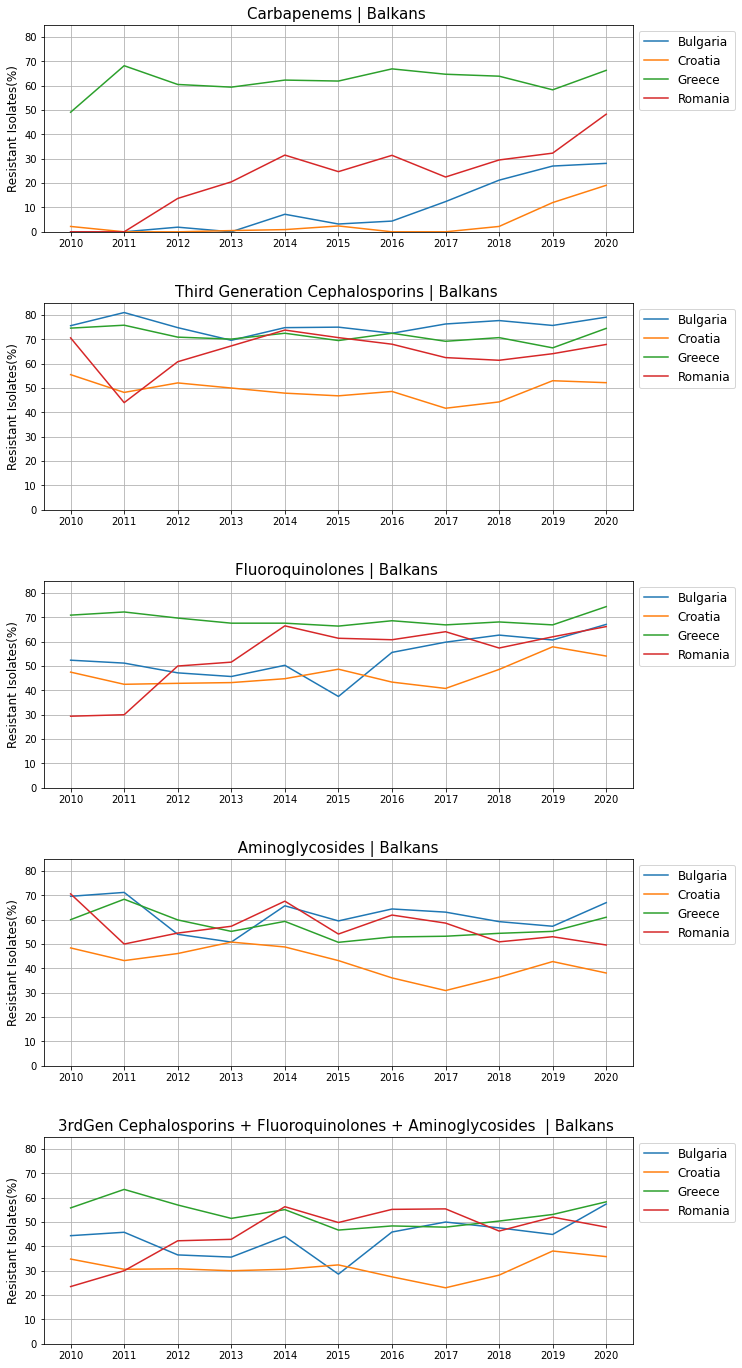

In [ ]:
#creating the variables to be used in conditional filtering of the dataset 
#these variables allow us to have less lines in the code

bulgaria = (df2["RegionName"]=="Bulgaria")
croatia = (df2["RegionName"]=="Croatia")
greece =  (df2["RegionName"]=="Greece")
romania =  (df2["RegionName"]=="Romania")

country_list = [bulgaria,croatia,greece,romania]

carbapenems_pct = (df2["Population"]=="Carbapenems")&(df2["Indicator"]=="R - resistant isolates, percentage  ")
thirdgen_cephalosporins_pct = (df2["Population"]=="Third-gen cephalosporins")&(df2["Indicator"]=="R - resistant isolates, percentage  ")
fluoroquinolones_pct = (df2["Population"]=="Fluoroquinolones")&(df2["Indicator"]=="R - resistant isolates, percentage  ")
aminoglycoside_pct = (df2["Population"]=="Aminoglycosides")&(df2["Indicator"]=="R - resistant isolates, percentage  ")
combined_resistance_pct =   (df2["Population"]=="Combined Resistance (third-gen + fluoro + amino)")&(df2["Indicator"]=="R - resistant isolates, percentage  ")


fig,axes = plt.subplots(5,1,figsize=(10,20))
plt.tight_layout(pad=5)

#Drawing Line Charts
#Instead of having to plot each country one-by-one for each axis, used for loops to avoid repetition

for i in country_list: 
  axes[0].plot(df2.Time[i & carbapenems_pct], df2.NumValue[i&carbapenems_pct])
axes[0].set_title("Carbapenems | Balkans ",fontsize = 15)

for i in country_list: 
  axes[1].plot(df2.Time[i&thirdgen_cephalosporins_pct], df2.NumValue[i&thirdgen_cephalosporins_pct])
axes[1].set_title("Third Generation Cephalosporins | Balkans ",fontsize = 15)

for i in country_list: 
  axes[2].plot(df2.Time[i& fluoroquinolones_pct], df2.NumValue[i& fluoroquinolones_pct])
axes[2].set_title("Fluoroquinolones | Balkans ",fontsize = 15)

for i in country_list: 
  axes[3].plot(df2.Time[i& aminoglycoside_pct], df2.NumValue[i& aminoglycoside_pct])
axes[3].set_title(" Aminoglycosides | Balkans ",fontsize = 15)

for i in country_list: 
  axes[4].plot(df2.Time[i& combined_resistance_pct], df2.NumValue[i& combined_resistance_pct])
axes[4].set_title("3rdGen Cephalosporins + Fluoroquinolones + Aminoglycosides  | Balkans ",fontsize = 15)

#formatting charts with for loop 
for i in range(len(axes)):
  axes[i].set_ylabel("Resistant Isolates(%)",fontsize=12)
  axes[i].legend(["Bulgaria","Croatia","Greece","Romania"],bbox_to_anchor=(1,1),prop={"size":12})
  axes[i].grid()
  axes[i].locator_params(axis="x",nbins=20)
  axes[i].locator_params(axis="y",nbins=10)
  axes[i].set_ylim(0,85)

#saving the figure
plt.savefig(f"{image_dir}/resistance_trends_Balkans.jpg",bbox_inches="tight",dpi =600)


The trends in Balkans are very inconsistent.  However, it’s clear that there has been a surge in resistance against carbapenems in the last 6 years.  It’s also safe to say that all the countries have relatively worrying levels of resistant strains. 


##Question 4 

While we're looking at regions of Europe, having a look at Central Europe is a good idea.  

Chart will contain information on Austria, Czechia, Germany, Hungary, Poland, Slovakia 


Remember that we had to perform some pre-processing for the 2010 data of Slovakia.  Due to this, the 2010 data were placed on the very end of our dataframe.  Because we're using Time on the x-axis of our line charts, a problem is going to arise. 

Allow me to demonstrate. 

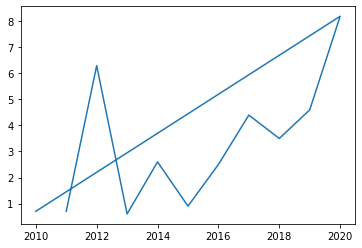

In [ ]:
plt.plot(df2.Time[(df2["RegionName"]=="Slovakia")&(df2["Population"]=="Carbapenems")&(df2["Indicator"]=="R - resistant isolates, percentage  ")],
         df2.NumValue[(df2["RegionName"]=="Slovakia")&(df2["Population"]=="Carbapenems")&(df2["Indicator"]=="R - resistant isolates, percentage  ")]);

In order to fix this issue, I'll create a new dataframe where the data is ranked by ascending order of Time 

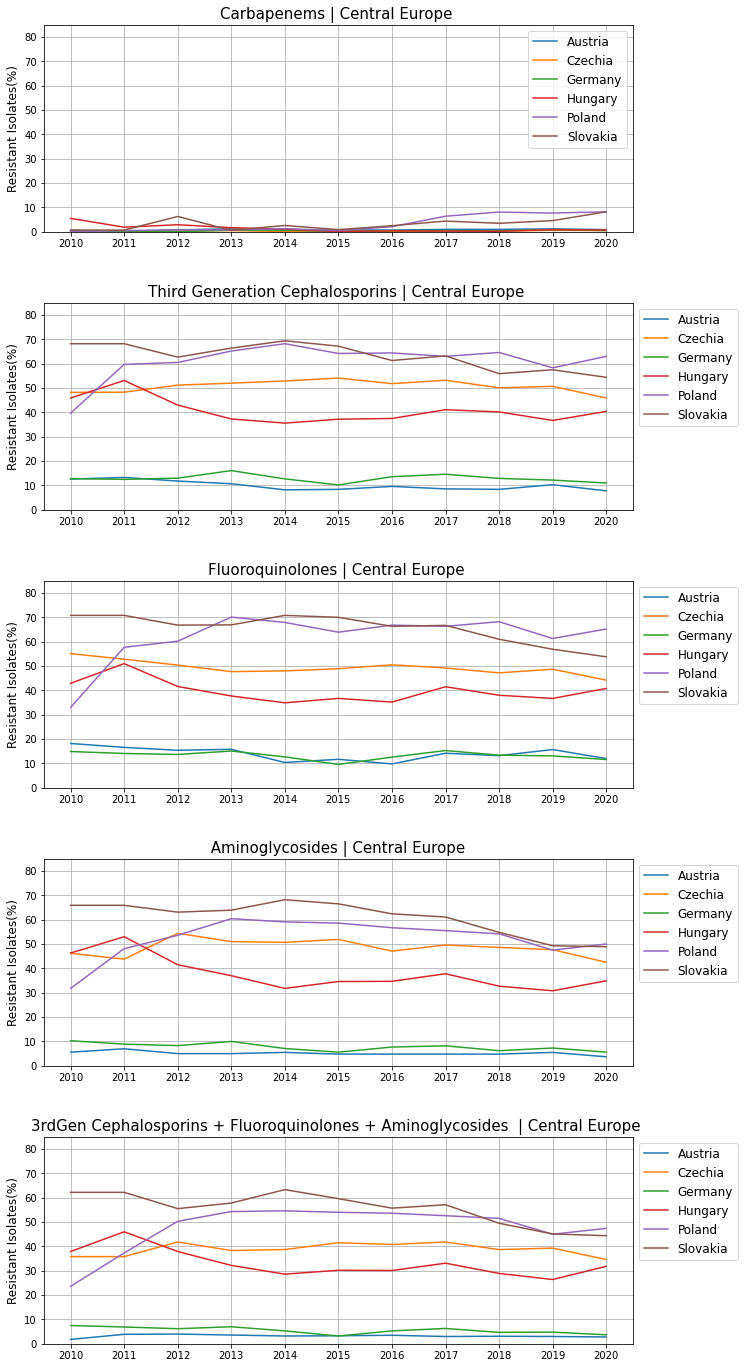

In [ ]:
ranked_df = df2.sort_values(by="Time",ascending=True)

austria = (ranked_df["RegionName"]=="Austria")
czechia = (ranked_df["RegionName"]=="Czechia")
germany = (ranked_df["RegionName"]=="Germany")
hungary =  (ranked_df["RegionName"]=="Hungary")
poland =  (ranked_df["RegionName"]=="Poland")
slovakia =  (ranked_df["RegionName"]=="Slovakia")

country_list = [austria, czechia,germany,hungary,poland,slovakia]

carbapenems_pct = (ranked_df["Population"]=="Carbapenems")&(ranked_df["Indicator"]=="R - resistant isolates, percentage  ")
thirdgen_cephalosporins_pct = (ranked_df["Population"]=="Third-gen cephalosporins")&(ranked_df["Indicator"]=="R - resistant isolates, percentage  ")
fluoroquinolones_pct = (ranked_df["Population"]=="Fluoroquinolones")&(ranked_df["Indicator"]=="R - resistant isolates, percentage  ")
aminoglycoside_pct = (ranked_df["Population"]=="Aminoglycosides")&(ranked_df["Indicator"]=="R - resistant isolates, percentage  ")
combined_resistance_pct =   (ranked_df["Population"]=="Combined Resistance (third-gen + fluoro + amino)")&(ranked_df["Indicator"]=="R - resistant isolates, percentage  ")

fig,axes = plt.subplots(5,1,figsize=(10,20))
plt.tight_layout(pad=5)


for i in country_list: 
  axes[0].plot(ranked_df.Time[i & carbapenems_pct], ranked_df.NumValue[i&carbapenems_pct])
axes[0].set_title("Carbapenems | Central Europe ",fontsize = 15)

for i in country_list: 
  axes[1].plot(ranked_df.Time[i&thirdgen_cephalosporins_pct], ranked_df.NumValue[i&thirdgen_cephalosporins_pct])
axes[1].set_title("Third Generation Cephalosporins | Central Europe ",fontsize = 15)

for i in country_list: 
  axes[2].plot(ranked_df.Time[i& fluoroquinolones_pct], ranked_df.NumValue[i& fluoroquinolones_pct])
axes[2].set_title("Fluoroquinolones | Central Europe ",fontsize = 15)

for i in country_list: 
  axes[3].plot(ranked_df.Time[i& aminoglycoside_pct], ranked_df.NumValue[i& aminoglycoside_pct])
axes[3].set_title(" Aminoglycosides | Central Europe ",fontsize = 15)

for i in country_list: 
  axes[4].plot(ranked_df.Time[i& combined_resistance_pct], ranked_df.NumValue[i& combined_resistance_pct])
axes[4].set_title("3rdGen Cephalosporins + Fluoroquinolones + Aminoglycosides  | Central Europe ",fontsize = 15)

for i in range(len(axes)):
  axes[i].set_ylabel("Resistant Isolates(%)",fontsize=12)
  axes[i].legend(["Austria","Czechia","Germany","Hungary","Poland","Slovakia"],bbox_to_anchor=(1,1),prop={"size":12})
  axes[i].grid()
  axes[i].locator_params(axis="x",nbins=20)
  axes[i].locator_params(axis="y",nbins=10)
  axes[i].set_ylim(0,85)

image_dir = "/content/gdrive/MyDrive/Online_Lecture_Notes/Data_Analysis_w_Python_Jovian/Course_Project/charts"
plt.savefig(f"{image_dir}/Resistance_CentralEurope.jpg",dpi=600)

Looking at the Central Europe, Germany and Austria have the lowest levels of resistance across all treatment options.  Contrary to this, Hungary and Poland share the top steps for the resistant strain ratio for all types of antibiotics.  An interesting note is that carbapenem resistant strains are drastically low in percentage in comparison to all the other treatments.  

#Discussion and Conclusion 

As we conclude our analysis on the antibiotic resistance towards different treatment options in Europe some interesting observations can be made on the data.  


First one would be the drastic differences in resistance percentages in countries that are located in close proximity to one another.  Some countries can have up to 50% more resistant strains than their border nations. These differences are most clearly illustrated in Central Europe.  


Another point that can be raised from the data would be the correlation between income per capita of a nation and the resistance levels.  It seems that bacteria populations in countries with higher income levels have lower levels of resistance towards bacteria.  The comparison between Scandinavia and Balkans demonstrates this notion quite clearly. 

We can also see that a consistent trend cannot be observed over the region.  Certain countries have consistently high levels of resistance, i.e. Greece, and other have fluctuations. 

All this considered, we can conclude that antibiotic resistance in Klebsiella pneumonia towards established treatment routines are very worrying in lower income countries of Europe while countries with higher income managed to keep the problem under control for the last 10 years.  
